## Chapter 6. 학습 관련 기술들

####     

In [8]:
from PIL import Image

### 6. 1 매개변수 갱신

- 신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것
- 즉, 매개변수의 최적값을 찾는 문제이다. -> 최적화 문제
- 지금까지 우리가 배운것은 미분을 이용해 SGD 방법으로 찾은 것

####     

#### 확률적 경사 하강법 SGD 복습

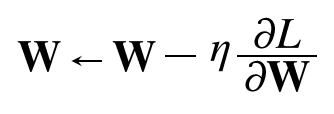

In [10]:
im = Image.open('deep_learning_images/e 6.1.png')
im

- W는 갱신할 가중치 매개변수 / 에타는 학습률이며 W에 대한 손실 함수 기울기를 곱한다.

####       

#### SGD의 단점

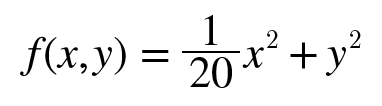

In [15]:
iim =Image.open('deep_learning_images/e 6.2.png')
im = Image.open('deep_learning_images/fig 6-1.png')
im2 = Image.open('deep_learning_images/fig 6-2.png')
iim

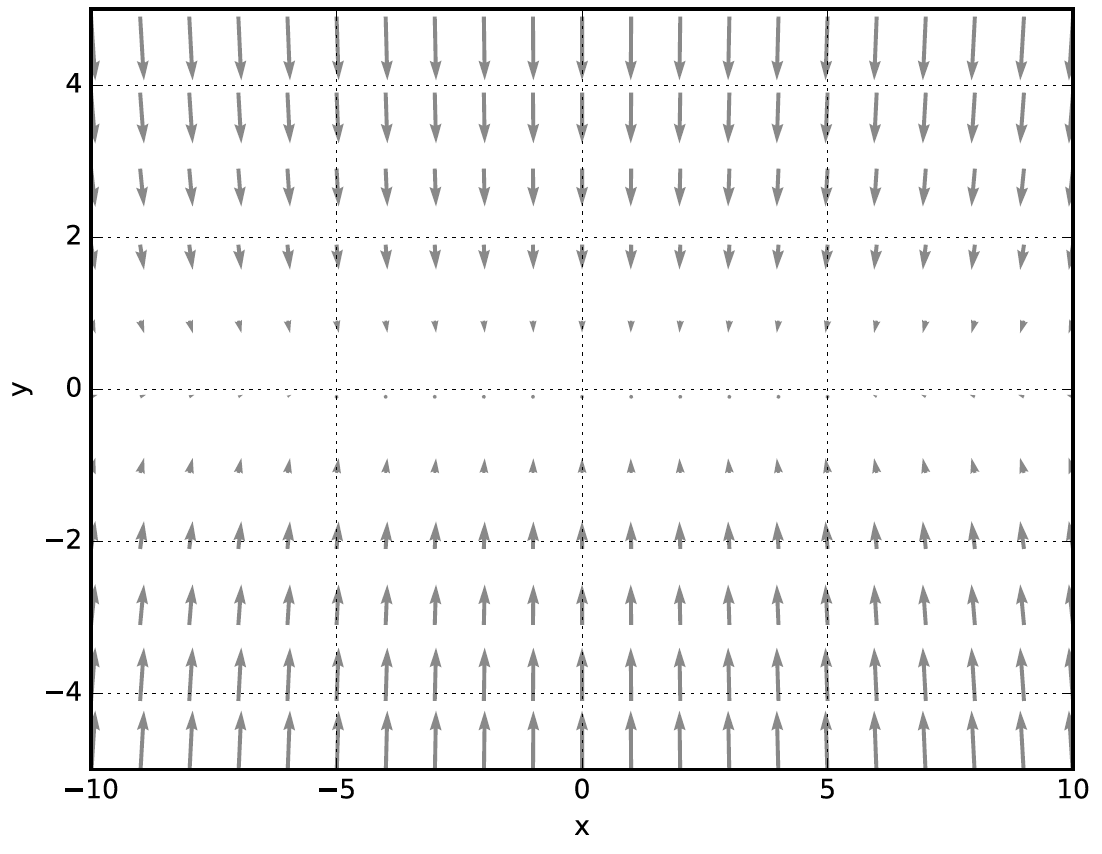

In [16]:
im2

- 위 식이 최소가 되는 장소는 (x,y) = (0,0)이지만, 위 그림에서 대부분은 (0,0)방향을 가리키지 않는다.

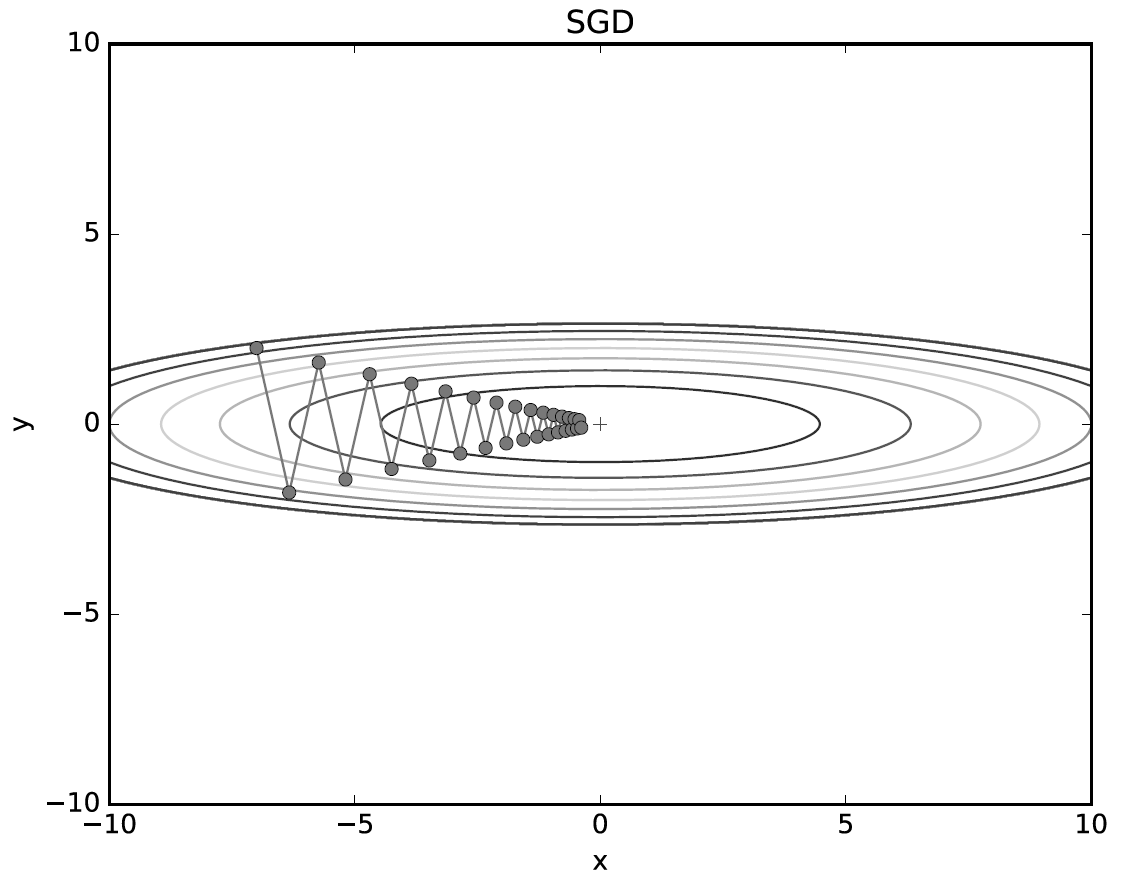

In [18]:
im = Image.open('deep_learning_images/fig 6-3.png')
im

- 지그재그로 상당히 비효율적인 움직임
- 탐색 경로가 비효율적인 단점이 있다
- 모멘텀, AdaGrad, Adam 방법으로 보완한다.

####      

#### 모멘텀

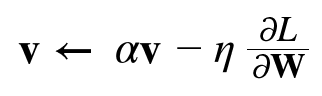

In [22]:
im = Image.open('deep_learning_images/e 6.3.png')
im2 = Image.open('deep_learning_images/e 6.4.png')
im

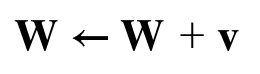

In [23]:
im2

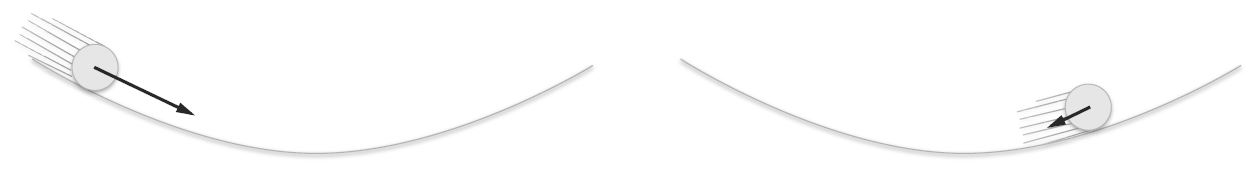

In [24]:
im = Image.open('deep_learning_images/fig 6-4.png')
im

- v라는 변수는 물리에서 말하는 속도

####      

#### 구현

In [27]:
class Momentum:
    def __init__(self, lr = 0.01 , momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v  = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

#####    

#### AdaGrad

- 학습률 lr 이 너무 작으면 학습시간이 너무 길어지고 너무 크면 발산한다.
- 학습률 정하는 효과적 기술 : 학습률 감소 -> 학습을 진행하면서 학습률을 줄여가는 방법

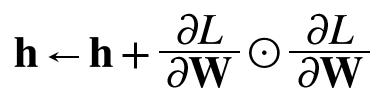

In [34]:
im = Image.open('deep_learning_images/e 6.5.png')
im2 = Image.open('deep_learning_images/e 6.6.png')
im

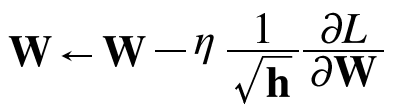

In [35]:
im2

- AdaGrad 수식
- 과녁 표시는 행렬의 원소별 곱셈을 의미
- 매개변수를 갱신할때 1/root(h)를 곱해 학습률을 조정

####     


#### 구현

In [41]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)



####    

#### 모멘텀과 AdaGrad 의 융합 Adam

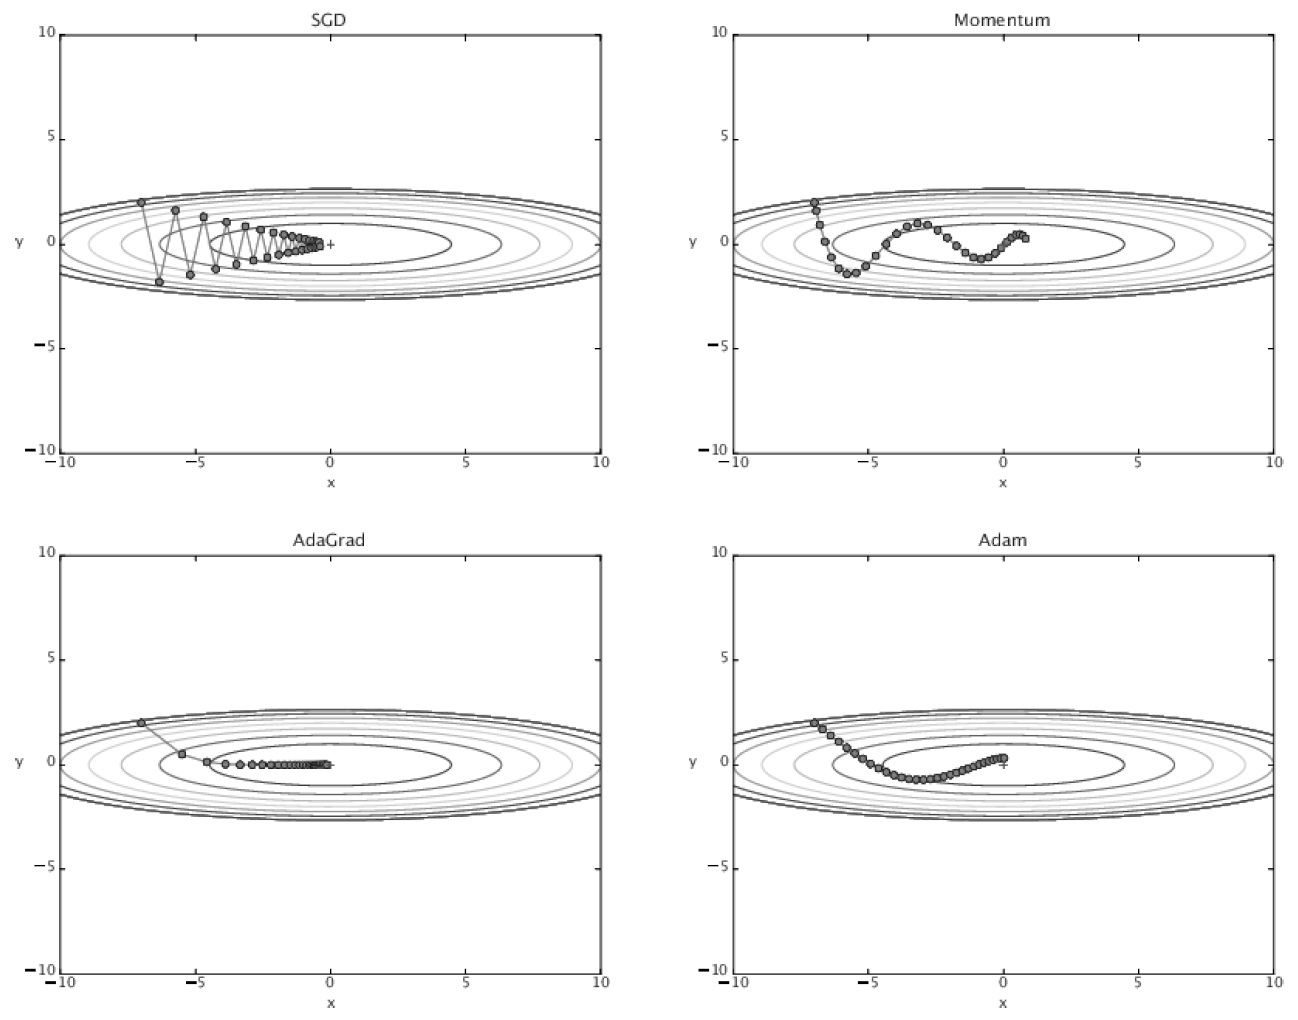

In [44]:
im = Image.open('deep_learning_images/fig 6-8.png')
im

- 절대적 방법은 없고 상황에 맞춰 쓴다.

####     

#### Mnist 데이터셋으로 갱신 방법 비교

===========iteration:0===========
Adam:2.2343950568
SGD:2.44628649377
AdaGrad:2.20889470007
Momentum:2.39460728941
===========iteration:100===========
Adam:0.20857184731
SGD:1.61714968287
AdaGrad:0.116113908236
Momentum:0.347584372772
===========iteration:200===========
Adam:0.200779921702
SGD:0.75765569882
AdaGrad:0.113519616352
Momentum:0.232180714773
===========iteration:300===========
Adam:0.199897607625
SGD:0.633157504419
AdaGrad:0.133711700789
Momentum:0.259451831846
===========iteration:400===========
Adam:0.0803732789233
SGD:0.352616208577
AdaGrad:0.0323823073036
Momentum:0.0664697609772
===========iteration:500===========
Adam:0.12165275074
SGD:0.437087604049
AdaGrad:0.0818304083006
Momentum:0.212690283944
===========iteration:600===========
Adam:0.107256450695
SGD:0.44080730739
AdaGrad:0.124829770042
Momentum:0.177189721049
===========iteration:700===========
Adam:0.1088424591
SGD:0.367001138747
AdaGrad:0.0807396391299
Momentum:0.162387681185
===========iteration:800=========

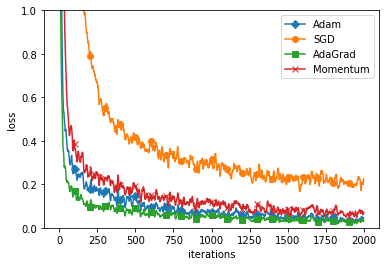

In [48]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

####    

### 6.2 가중치의 초깃값

#### 가중치 감소기법

- 초깃값을 0으로 하면 Too bad
- 초깃값을 무작위로 하는 것이 good
- 가중치의 초깃값에 따라 은닉층 활성화값이 어떻게 되는지 관찰하면 중요한 정보 get

####    

#### 은닉층의 활성화값 분포 살피기

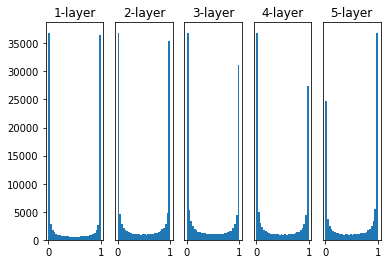

In [55]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 층은 5개 이며 층의 뉴런은 100개씩 있다.
- 입력데이터는 1000개 데이터 정규분포로 무작위 생성
- 각 층의 활성화값들이 0과 1에 치우쳐 분포 
- 시그모이드 함수는 출력이 0 or 1 가까워지자 0으로 다가감
- 데이터가 0, 1 치우쳐 분포하게 되면 역전파의 기울기 값이 작아지다가 사라지는 '기울기 소실' 발생

In [ ]:
# w = np.random.randn(node_num, node_num) * 0.01 로 바꿔 재실행 

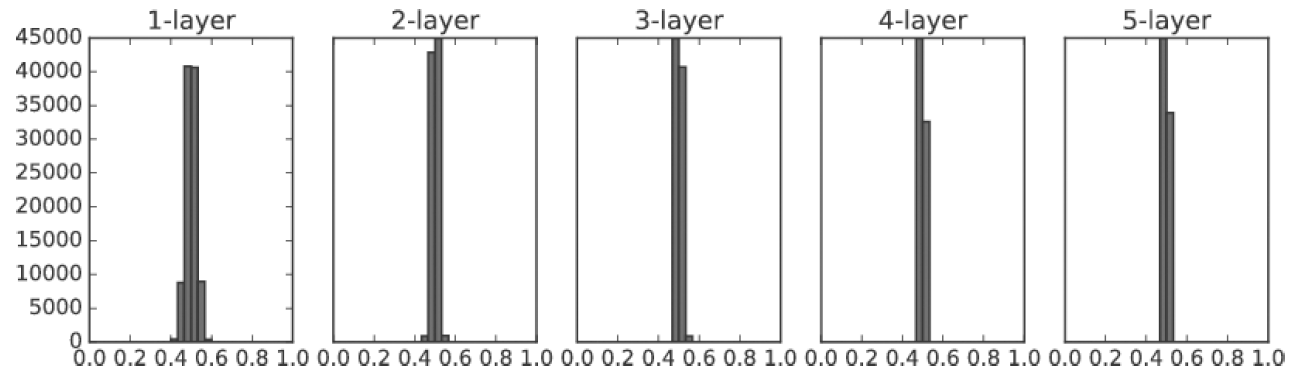

In [57]:
im = Image.open('deep_learning_images/fig 6-11.png')
im

- 0과 1로 치우지치도 않았고 기울기 소실도 발생하지 않았지만 여러개 뉴런 둔 의미 X
- 표현력을 제한하였다.

####    

#### 논문에서 권장하는 가중치 Xavier 초깃값

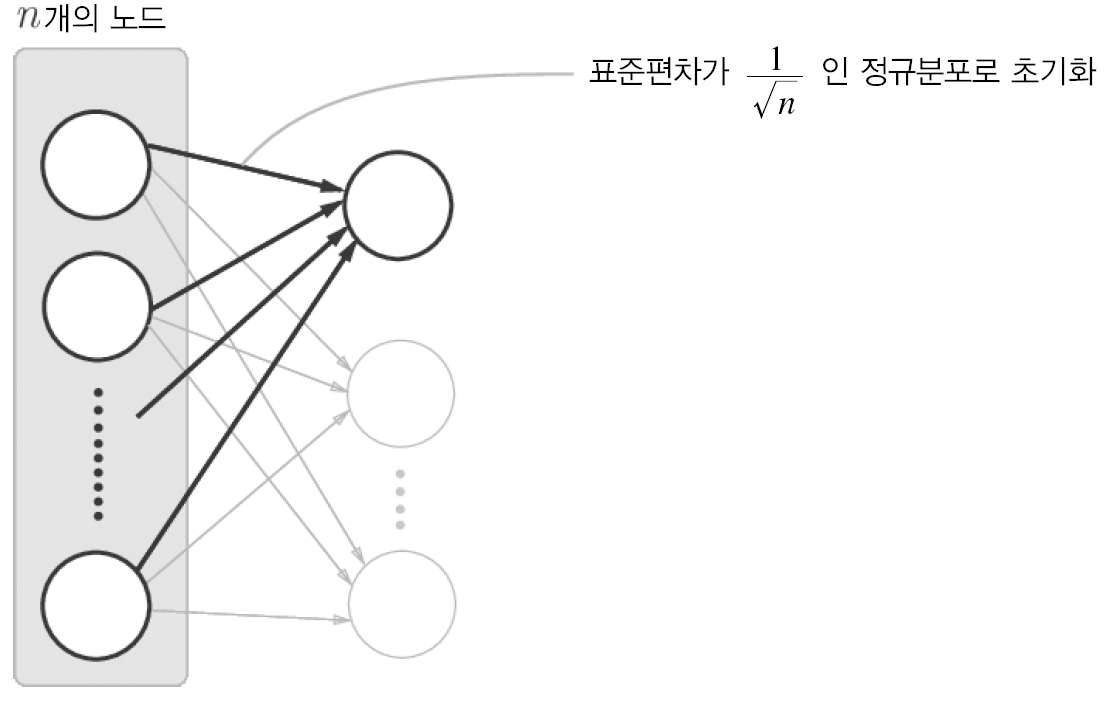

In [60]:
im = Image.open('deep_learning_images/fig 6-12.png')
im

- 이 논문의 목적은 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 함
- 앞 계층의 노드가 n개 라면 표준편차가 1/root(n)인 분포를 사용하면 된다는 결론

In [ ]:
  # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) 사용한 결과

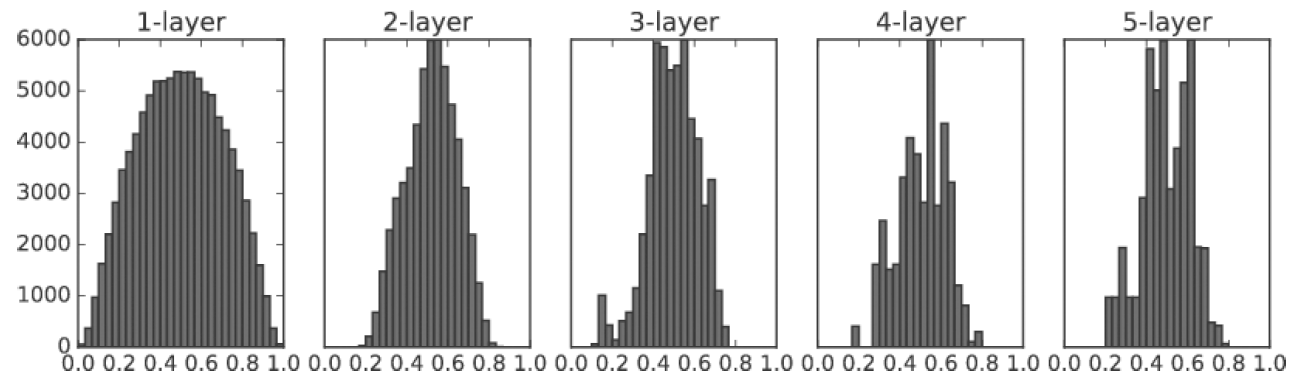

In [62]:
im = Image.open('deep_learning_images/fig 6-13.png')
im

- 층이 깊어지면서 넓게 골고루 퍼져있는 것을 볼수 있음
- 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄졌다.

####     

#### ReLU 사용할 때 가중치 초깃값

In [ ]:
- Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 한 것
- ReLU 함수를 이용할 때는 ReLU 에 특화된 초깃값을 이용하는 것이 좋다.
- He 초깃값으로 앞 계층이 n개일 때 표준편차가 root(2/n)인 정규분포 사용(Xavier의 루트 2배 계수)

In [ ]:
# w = np.random.randn(node_num, node_num) * 1 사용한 결과
# w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) 사용한 결과
# w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) 사용한 결과

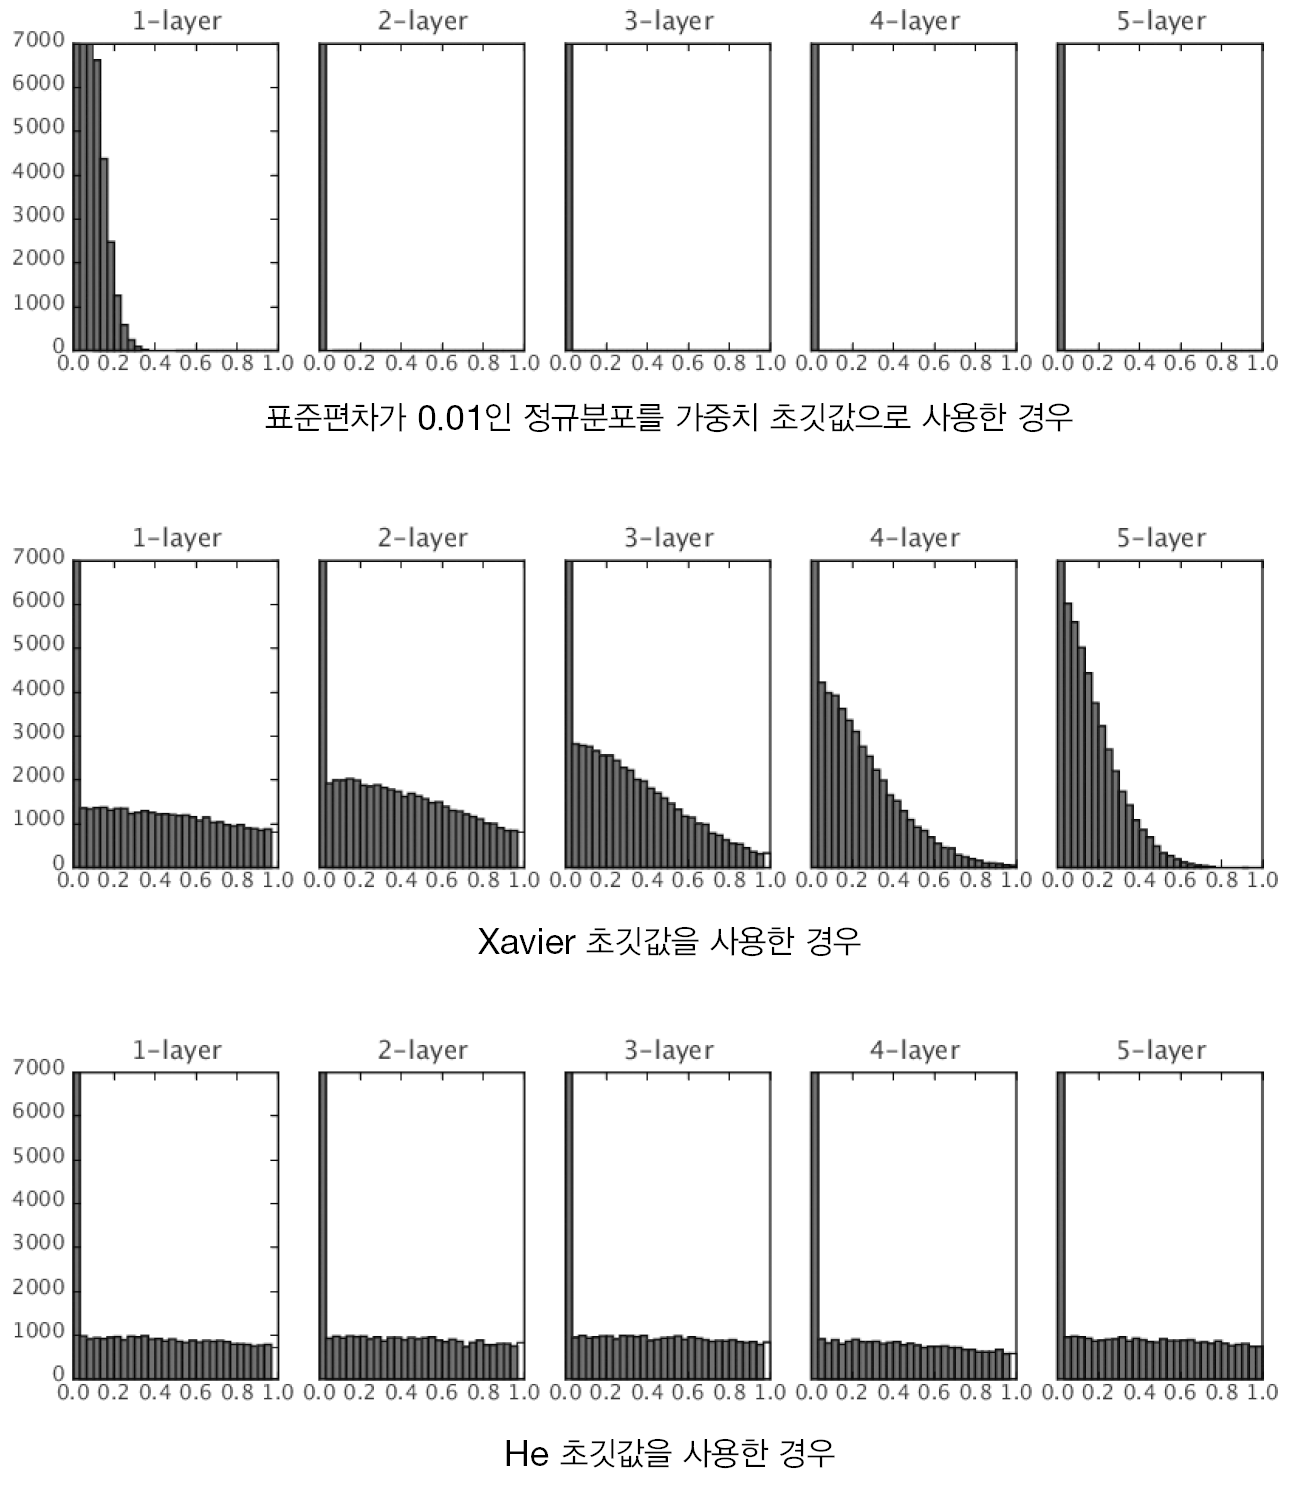

In [66]:
im = Image.open('deep_learning_images/fig 6-14.png')
im

####    

#### MNIST 데이터셋으로 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.30250868665
He:2.36561624443
Xavier:2.29876646812
===========iteration:100===========
std=0.01:2.30276448552
He:1.52538570094
Xavier:2.26070758164
===========iteration:200===========
std=0.01:2.30185050653
He:0.69275195941
Xavier:2.18534305912
===========iteration:300===========
std=0.01:2.30167387937
He:0.454037039448
Xavier:1.99793718632
===========iteration:400===========
std=0.01:2.30303742348
He:0.349443562265
Xavier:1.62035257444
===========iteration:500===========
std=0.01:2.30088151937
He:0.482743018394
Xavier:1.14093437272
===========iteration:600===========
std=0.01:2.30142218024
He:0.318078875683
Xavier:0.802289141378
===========iteration:700===========
std=0.01:2.30001201247
He:0.271987157209
Xavier:0.590457893881
===========iteration:800===========
std=0.01:2.30360488743
He:0.247437535091
Xavier:0.496045259924
===========iteration:900===========
std=0.01:2.29865179098
He:0.227038393447
Xavier:0.361320735403
===========iteration:

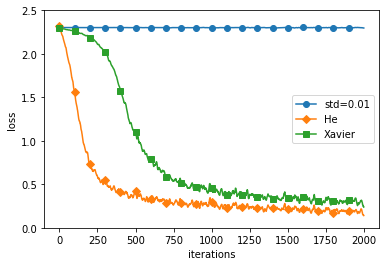

In [69]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

- 층별 뉴런 수가 100개인 5층 신경망에서 활성화함수 ReLU를 사용
- std = 0.01일때 는 학습 x  순전파 때 너무 작은값(0근처)가 흐른다. 그로 인해 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 X

####     

### 6. 3 배치 정규화

- 각 층이 활성화를 적당히 퍼뜨리도록 강제하는 것
- 학습을 빨리 진행할 수 있다.
- 초깃값에 의존하지 않는다.
- 오버피팅을 억제한다.

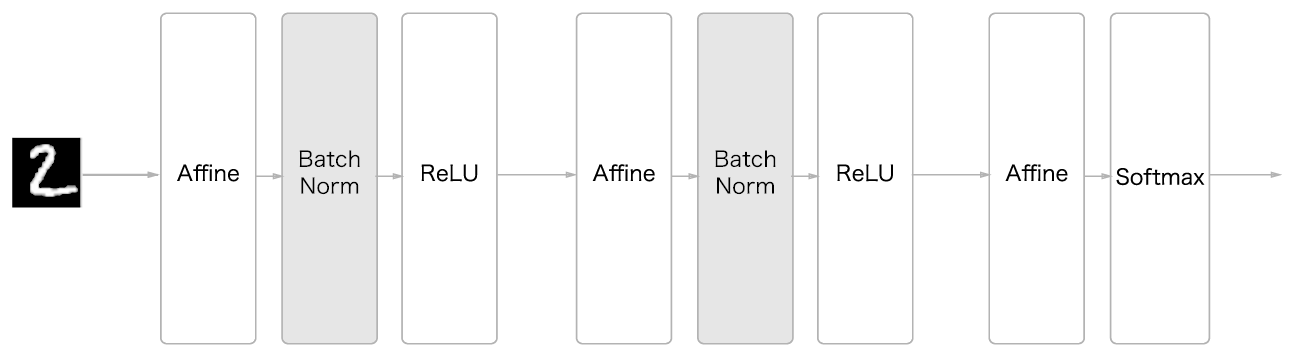

In [72]:
im = Image.open('deep_learning_images/fig 6-16.png')
im

- 데이터 분포를 정규화하는 배치 정규화 계층을 삽입
- 미니배치를 단위로 정규화하며 평균이 0 분산이 1되도록 정규화

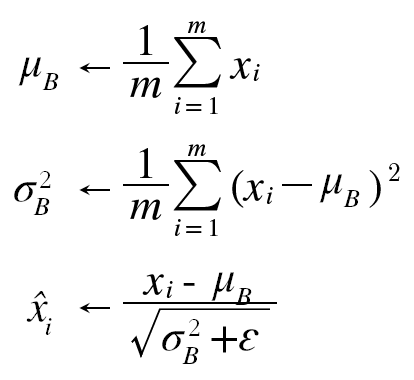

In [74]:
im = Image.open('deep_learning_images/e 6.7.png')
im

- 입실론은 0되는 것 방지용
- 위의 식은 입력데이터가 평균 0, 분산 1인 데이터로 변환하는 일을 함
- 이 처리를 활성화 함수의 앞(or 뒤)에 삽입함으로써 데이터가 분포에 덜 치우치게된다.

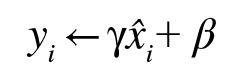

In [76]:
im = Image.open('deep_learning_images/e 6.8.png')
im

- 배치 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동을 수행
- r이 확대, 베타가 이동을 담당 
- 두 값은 처음에 1, 0 으로 시작해 학습하면서 적합값을 조정해감

In [80]:
####    

#### 배치 정규화의 효과 MNIST 데이터

============== 1/16 ==============
epoch:0 | 0.094 - 0.104
epoch:1 | 0.097 - 0.116
epoch:2 | 0.097 - 0.149
epoch:3 | 0.097 - 0.149
epoch:4 | 0.097 - 0.161
epoch:5 | 0.097 - 0.189
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.238
epoch:8 | 0.097 - 0.252
epoch:9 | 0.097 - 0.276
epoch:10 | 0.097 - 0.3
epoch:11 | 0.097 - 0.317
epoch:12 | 0.097 - 0.34
epoch:13 | 0.097 - 0.356
epoch:14 | 0.097 - 0.377
epoch:15 | 0.097 - 0.393
epoch:16 | 0.097 - 0.392
epoch:17 | 0.097 - 0.421
epoch:18 | 0.097 - 0.417
epoch:19 | 0.097 - 0.438
============== 2/16 ==============


C:\Users\good\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


epoch:0 | 0.116 - 0.097
epoch:1 | 0.097 - 0.109
epoch:2 | 0.097 - 0.144
epoch:3 | 0.097 - 0.18
epoch:4 | 0.097 - 0.218
epoch:5 | 0.097 - 0.25
epoch:6 | 0.097 - 0.273
epoch:7 | 0.097 - 0.296
epoch:8 | 0.097 - 0.318
epoch:9 | 0.097 - 0.344
epoch:10 | 0.097 - 0.371
epoch:11 | 0.097 - 0.386
epoch:12 | 0.097 - 0.415
epoch:13 | 0.097 - 0.426
epoch:14 | 0.097 - 0.449
epoch:15 | 0.097 - 0.457
epoch:16 | 0.097 - 0.483
epoch:17 | 0.097 - 0.491
epoch:18 | 0.097 - 0.503
epoch:19 | 0.097 - 0.517
============== 3/16 ==============
epoch:0 | 0.134 - 0.139
epoch:1 | 0.387 - 0.125
epoch:2 | 0.552 - 0.129
epoch:3 | 0.673 - 0.167
epoch:4 | 0.778 - 0.187
epoch:5 | 0.831 - 0.21
epoch:6 | 0.87 - 0.24
epoch:7 | 0.918 - 0.281
epoch:8 | 0.94 - 0.315
epoch:9 | 0.954 - 0.343
epoch:10 | 0.965 - 0.379
epoch:11 | 0.972 - 0.407
epoch:12 | 0.981 - 0.428
epoch:13 | 0.986 - 0.458
epoch:14 | 0.991 - 0.492
epoch:15 | 0.993 - 0.524
epoch:16 | 0.991 - 0.54
epoch:17 | 0.994 - 0.559
epoch:18 | 0.995 - 0.576
epoch:19 | 0.996 

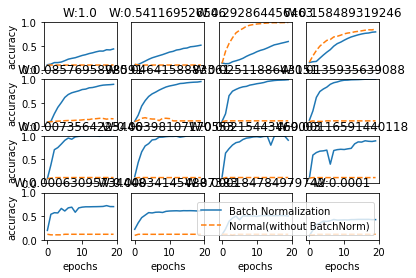

In [79]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

### 6. 4 바른학습을 위해

#### 오버피팅

- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

####    

#### 오버피팅 방지

#### 가중치 감소

In [ ]:
- 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과
- 예를들어 L2 법칙 : (1/2)*람다*W^2 람다는 정규화의 세기를 조절하는 하이퍼파라미터

#### 드롭아웃

- 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어렵다.
- 드롭아웃은 뉴런을 임의로 삭제하면서 학습
- 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제
- 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위 선택, 시험 때는 모든 뉴런에 신호를 전달(훈련 때 삭제한 비율을 곱하여 출력)

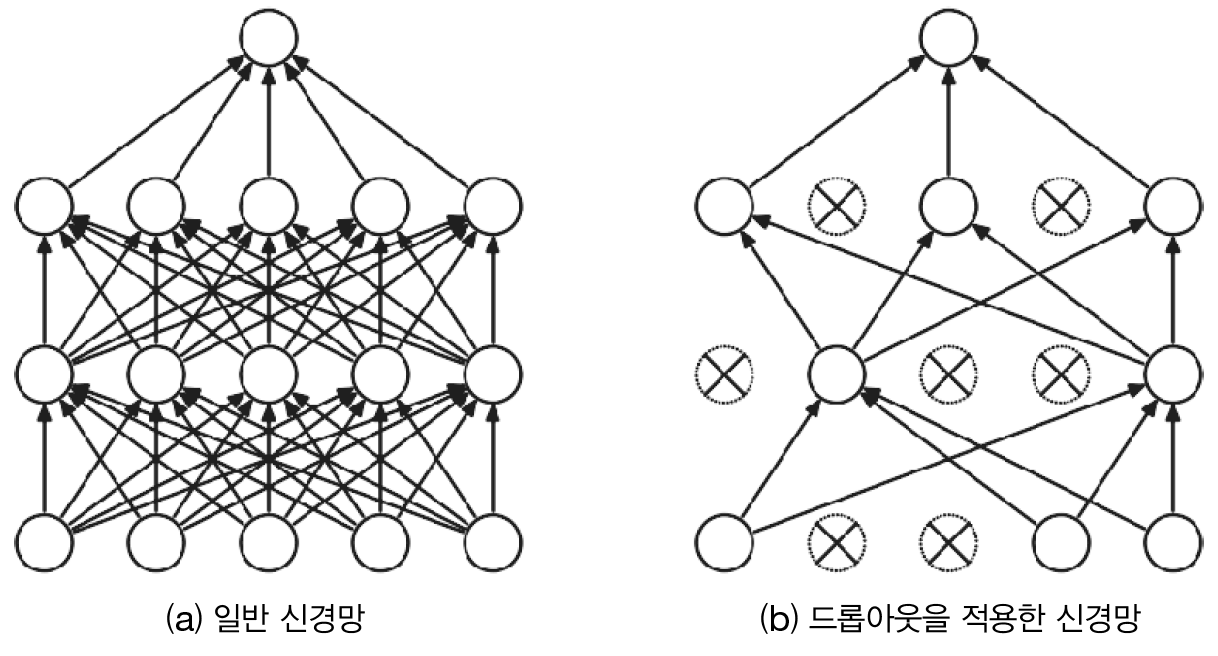

In [88]:
im = Image.open('deep_learning_images/fig 6-22.png')
im

In [89]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x, shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    def backward(self, dout):
        return dout * self.mask

- 순전파를 담당하는 forward 메서드에는 훈련 때(train_flg = True)일때 만 잘 계산해두고 시험 때는 흘리기만 하면됨
- self.mask는 x와 형상이 같은 배열을 무작위로 생성하고 그값이 dropout_ratio 보다 큰 원소만 True 로 설정


####    

### 6. 5 적절한 하이퍼파라미터 값 찾기

#### 검증데이터

- 훈련데이터는 매개변수(가중치, 편향)의 학습에 이용
- 검증데이터는 하이퍼파라미터의 성능 평가에 이용
- 시험데이터는 범용 성능을 확인하기 위해 (일반적 한번만) 이용

In [92]:
# MNIST 데이터로 찢는 예시
(x_train, t_train), (x_test, t_test) = load_mnist()


def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.
    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20퍼센트를 검증 데이터로 분할 
validation_rate = 0.20
validation_num = int(x_train.shape[0]* validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

####    

#### 하이퍼파라미터 최적화

- 하이퍼파라미터 범위는 대략적으로 지정하는 것이 효과적 
- 0.001 과 1000사이와 같이 10의 거듭제곱 단위로 범위 지정(로그스케일로 지정)
- 0단계 : 하이퍼파라미터 값의 범위 설정
- 1단계 : 설정된 범위에서 하이퍼파라미터 값을 무작위로 추출
- 2단계 : 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습, 검증 데이터로 정확도를 평가(에폭은 작게 설정)
- 3단계 : 1단계와 2단계를 특정 횟수(100회등을) 반복, 하이퍼파라미터 범위를 좁힌다.
- 이 무식한 방법을 사용하지 않는다면 베이즈 최적화를 써라

####    

### 정리
- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외 모멘텀, AdaGrad, Adam 이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 중요
- 가중치 초깃값으로 Xavier 와 He 초깃값이 효과적
- 배치 정규화를 이용하면 학습을 빠르게 진행 할 수 있고 초깃값에 덜 영향
- 오버피팅 억제하기 위해 가중치 감소와 드롭아웃 사용
- 하이퍼파라미터 값 탐색은 최적값이 존재할만한 범위 좁히면서 하는게 효과적